# Sales Analysis 

In this project we are going to clean the data if we found any missing or unwanted data,manipulate data according to the requreiment,Explore the data and implement  visualizations techniques to understand data better

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Merge data from each month into one csv

In [18]:
files=os.listdir(r"C:\Users\Poornima Kalli\Desktop\projects from dataquest new\Sales_Data")

In [19]:
path=r"C:\Users\Poornima Kalli\Desktop\projects from dataquest new\Sales_Data"
final=pd.DataFrame()
for file in files:
    c=pd.read_csv(path+'/'+file,encoding="utf-8")
    final=pd.concat([final,c])

In [20]:
final.shape

(186850, 6)

In [21]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Cleaning the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

Drop rows of NAN

In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [23]:
p=final[final.isna().any(axis=1)]
p.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
final=final.dropna()
final


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [25]:
final.shape

(186305, 6)

In [26]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [27]:
final.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [28]:
final.iloc[516]

Order ID                                       177054
Product                      Apple Airpods Headphones
Quantity Ordered                                    1
Price Each                                        150
Order Date                             04/09/19 19:18
Purchase Address    800 Jackson St, Atlanta, GA 30301
Name: 518, dtype: object

In [29]:
final.drop_duplicates(inplace=True)

In [32]:
#final.drop(final.index[516],inplace=True)

In [33]:
final["Quantity Ordered"]=pd.to_numeric(final["Quantity Ordered"])
final["Price Each"]=pd.to_numeric(final["Price Each"])

In [34]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185675 non-null  object 
 1   Product           185675 non-null  object 
 2   Quantity Ordered  185675 non-null  int64  
 3   Price Each        185675 non-null  float64
 4   Order Date        185675 non-null  object 
 5   Purchase Address  185675 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


Adding one more column with value month in it

In [35]:
final["Order Date"].head()

0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object

In [36]:
final["Order Date"]=pd.to_datetime(final["Order Date"])
final["month"]=final["Order Date"].dt.month

In [37]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [38]:
def get_City(x):
    p=x.split(",")
    s=x.split(",")[2].strip(" ")[0:2]
    return(p[1]+'('+s+')')
    
final["City"]=final["Purchase Address"].apply(get_City)

In [39]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


Data Exploration!

Question 1: What was the best month for sales? How much was earned that month?

In [40]:
final["sales"]=final["Price Each"]*final["Quantity Ordered"]
p=final.groupby("month")["sales"].sum()
p=p.reset_index()
p.rename(columns={"sales":"Total amount earned"},inplace=True)

In [41]:
p=p.sort_values("Total amount earned",ascending=False)
p

,month,Total amount earned
11,12,4608280.75
9,10,3734177.86
3,4,3389217.98
10,11,3197863.10
4,5,3150506.24
2,3,2804969.51
6,7,2646311.32
5,6,2576268.16
7,8,2241071.38
1,2,2200075.09


In [42]:
p.head(1)

,month,Total amount earned
11,12,4608280.75


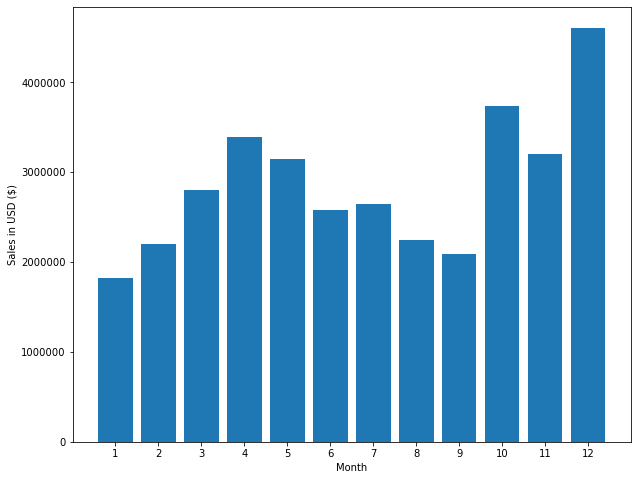

In [43]:
plt.figure(figsize=(10,8))
plt.bar(p["month"],p["Total amount earned"])
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.ticklabel_format(style='plain')
plt.show()

December month has the maximum number of sales compared with other months

which city sold most the products

In [45]:
p=final.groupby("City").sum()
p=p.sort_values("sales",ascending=False)
p.reset_index(inplace=True)

In [46]:
p

,City,Quantity Ordered,Price Each,month,sales
0,San Francisco(CA),50166,8203867.45,314927,8254609.62
1,Los Angeles(CA),33245,5417147.76,208003,5448280.34
2,New York City(NY),27901,4632767.55,175548,4661714.15
3,Boston(MA),22492,3633698.41,140887,3657927.66
4,Atlanta(GA),16583,2778604.85,104646,2794195.23
5,Dallas(TX),16707,2750026.38,104447,2765373.96
6,Seattle(WA),16534,2730586.55,104817,2745046.02
7,Portland(OR),11291,1859836.44,70517,1870010.56
8,Austin(TX),11136,1808325.08,69708,1818029.38
9,Portland(ME),2746,446752.36,17119,449321.38


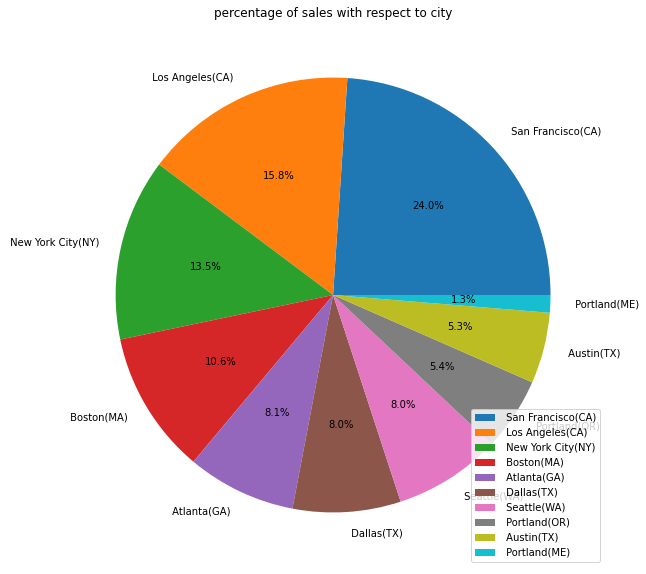

In [47]:
plt.figure(figsize=(14,10))
plt.pie(p["sales"],labels=p["City"],autopct="%.1f%%")
plt.legend(loc="lower right")
plt.title("percentage of sales with respect to city")
plt.show()

What time should we display advertisements to maximize likelihood of customer's buying product?

In [48]:
final["hour"]=final["Order Date"].dt.hour
final["minutes"]=final["Order Date"].dt.minute

In [49]:
x=final["hour"].value_counts().reset_index()
x.rename(columns={"index":"Hour","hour":"Number of people ordering with respect to hours"},inplace=True)

In [50]:
x=x.sort_values("Hour",ascending=True)
x

,Hour,Number of people ordering with respect to hours
17,0,3902
19,1,2347
21,2,1242
23,3,830
22,4,852
20,5,1320
18,6,2481
16,7,4002
15,8,6252
13,9,8738


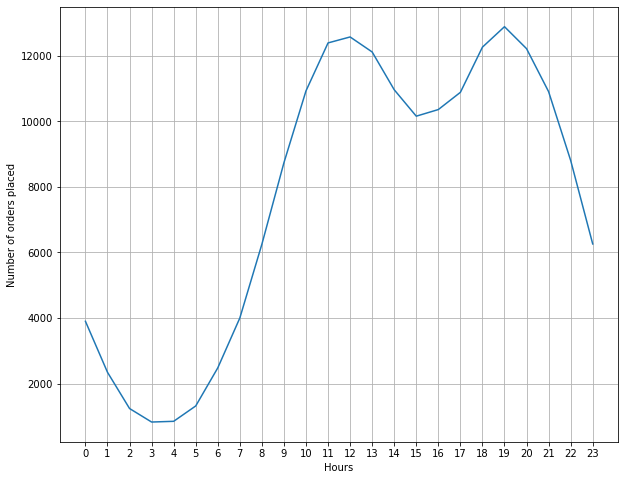

In [51]:
plt.figure(figsize=(10,8))
plt.plot(x["Hour"],x["Number of people ordering with respect to hours"])
plt.grid()
plt.xticks(range(0,24))
plt.xlabel("Hours")
plt.ylabel("Number of orders placed")
plt.show()

From the line graph we can tell that 7pm is best and slightly before 11 am is preferred for  displaying advertisements

what products are most often sold together

In [52]:
def convert(x):
    return(','.join(x))
new=final[final["Order ID"].duplicated(keep=False)]
new["group"]=new.groupby("Order ID")["Product"].transform(convert)
new.head()

C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_12188/2655079326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["group"]=new.groupby("Order ID")["Product"].transform(convert)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales,hour,minutes,group
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles(CA),11.95,19,42,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco(CA),5.98,17,0,"AAA Batteries (4-pack),Google Phone"


In [53]:
p=new.groupby("group")["Order ID"].count()
p

group
20in Monitor,27in FHD Monitor                         4
20in Monitor,34in Ultrawide Monitor                   2
20in Monitor,AA Batteries (4-pack)                   12
20in Monitor,AAA Batteries (4-pack)                   6
20in Monitor,Apple Airpods Headphones                14
                                                   ... 
iPhone,ThinkPad Laptop                                8
iPhone,USB-C Charging Cable                          24
iPhone,Vareebadd Phone                                6
iPhone,Wired Headphones                             722
iPhone,Wired Headphones,Lightning Charging Cable      3
Name: Order ID, Length: 350, dtype: int64

In [56]:
p=p.reset_index()
p.rename(columns={"group":"Products brougth together","Order ID":"Number of times these products are repeated"},inplace=True)
#p.drop("index",axis=1,inplace=True)

In [57]:
p

,Products brougth together,Number of times these products are repeated
0,"20in Monitor,27in FHD Monitor",4
1,"20in Monitor,34in Ultrawide Monitor",2
2,"20in Monitor,AA Batteries (4-pack)",12
3,"20in Monitor,AAA Batteries (4-pack)",6
4,"20in Monitor,Apple Airpods Headphones",14
...,...,...
345,"iPhone,ThinkPad Laptop",8
346,"iPhone,USB-C Charging Cable",24
347,"iPhone,Vareebadd Phone",6
348,"iPhone,Wired Headphones",722


In [58]:
p=p.sort_values("Number of times these products are repeated",ascending=False)
p

,Products brougth together,Number of times these products are repeated
329,"iPhone,Lightning Charging Cable",1772
165,"Google Phone,USB-C Charging Cable",1714
348,"iPhone,Wired Headphones",722
286,"Vareebadd Phone,USB-C Charging Cable",624
180,"Google Phone,Wired Headphones",606
...,...,...
93,"AAA Batteries (4-pack),LG Dryer",2
194,"LG Washing Machine,20in Monitor",2
195,"LG Washing Machine,27in 4K Gaming Monitor",2
196,"LG Washing Machine,AA Batteries (4-pack)",2


In [59]:
p.head(10)

,Products brougth together,Number of times these products are repeated
329,"iPhone,Lightning Charging Cable",1772
165,"Google Phone,USB-C Charging Cable",1714
348,"iPhone,Wired Headphones",722
286,"Vareebadd Phone,USB-C Charging Cable",624
180,"Google Phone,Wired Headphones",606
321,"iPhone,Apple Airpods Headphones",572
156,"Google Phone,Bose SoundSport Headphones",322
175,"Google Phone,USB-C Charging Cable,Wired Headph...",237
292,"Vareebadd Phone,Wired Headphones",208
341,"iPhone,Lightning Charging Cable,Wired Headphones",168


These are the Top 10 items which are bought together

what product sold the most? why do you think it is sold most?

In [60]:
p=final.groupby("Product")["Quantity Ordered"].sum().reset_index()

In [61]:
p

,Product,Quantity Ordered
0,20in Monitor,4125
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27614
5,AAA Batteries (4-pack),30985
6,Apple Airpods Headphones,15636
7,Bose SoundSport Headphones,13429
8,Flatscreen TV,4813
9,Google Phone,5528


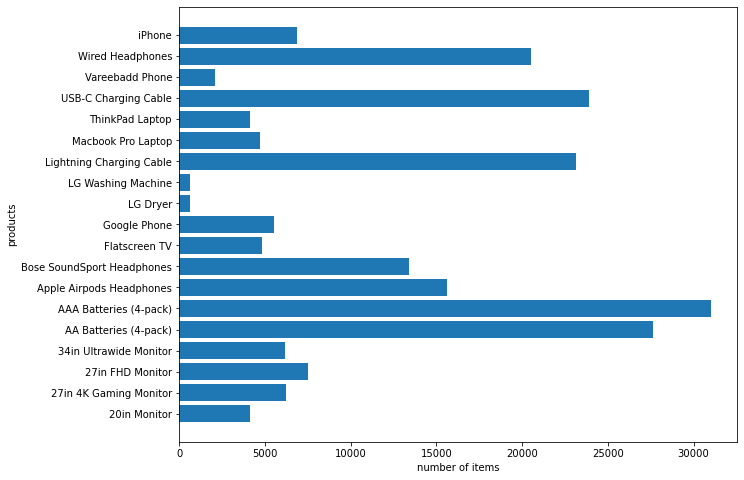

In [76]:
plt.figure(figsize=(10,8))
plt.barh(p["Product"],p["Quantity Ordered"])
plt.ylabel("products")
plt.xlabel("number of items")
plt.show()

In [73]:
S=final.groupby("Product")["Price Each"].mean()
S=S.reset_index()
S.rename(columns={"Price Each":"Price"},inplace=True)
S

,Product,Price
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


In [85]:
new_data=pd.merge(left=p,on="Product",right=S,how="left")
new_data.rename(columns={"Quantity Ordered":"Total Number of products"},inplace=True)
new_data

,Product,Total Number of products,Price
0,20in Monitor,4125,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27614,3.84
5,AAA Batteries (4-pack),30985,2.99
6,Apple Airpods Headphones,15636,150.00
7,Bose SoundSport Headphones,13429,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5528,600.00


C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_12188/1208251427.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_data["Product"],rotation=90)


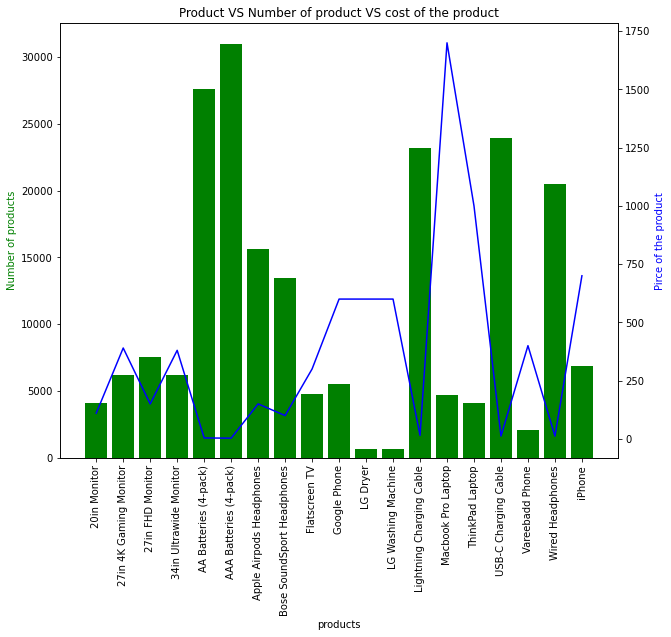

In [103]:
fig,ax=plt.subplots(figsize=(10,8))
ax2=ax.twinx()
ax.bar(new_data["Product"],new_data["Total Number of products"],color='g')
ax2.plot(new_data["Product"],new_data["Price"],color="b")
ax.set_xlabel("products")
ax.set_ylabel("Number of products",color="g")
ax2.set_ylabel("Pirce of the product",color="b")
ax.set_xticklabels(new_data["Product"],rotation=90)
plt.title("Product VS Number of product VS cost of the product")
plt.show()

we can tell from the bar and line graph that pirce is less for maximum number of products sold